Task 3:
# CNN Feature Mapping
(RUPESH_KUMAR_UPES_DEHRADUN)

Implementation Of CNN with feature Maps on Mnist dataset

Importing required libraries and the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
len(X_train), len(X_test), X_train[0].shape

(60000, 10000, (28, 28))

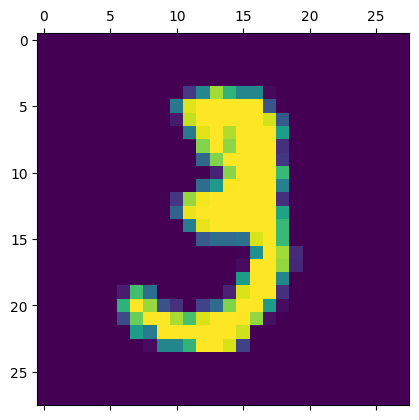

In [4]:
plt.matshow(X_train[10])

In [5]:
Y_train[10]

3

In [6]:
width = height = X_train.shape[1]

data preprocessing

In [7]:
max_rbg_value = 255

X_train = X_train.reshape((X_train.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

X_test = X_test.reshape((X_test.shape[0],
                          width,
                          height,
                          1)).astype(np.float32)/max_rbg_value

#One-hot encoding of the training and testing labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

creating CNN model

In [8]:
#creating the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 64)                495680    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

training the model

In [10]:
#compiling and fitting the data to our CNN
opt=Adam(lr=.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1875/1875 [==============================] - 74s 38ms/step - loss: 0.3200 - accuracy: 0.9097 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1056 - accuracy: 0.9694 - val_loss: 0.0790 - val_accuracy: 0.9761
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0703 - accuracy: 0.9798 - val_loss: 0.0575 - val_accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0407 - val_accuracy: 0.9863


evaluating the model

In [11]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0407 - accuracy: 0.9863


[0.04070634767413139, 0.986299991607666]

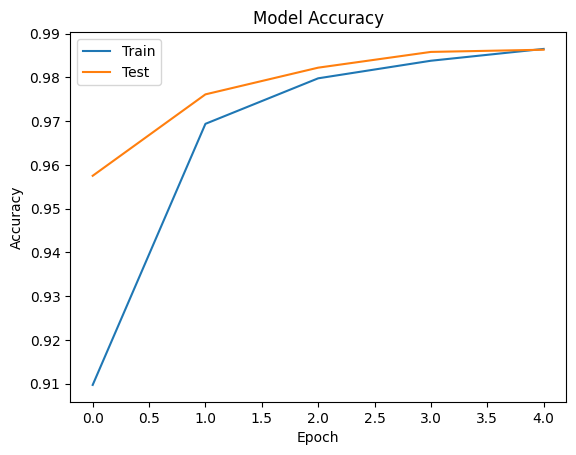

In [12]:
#plotting training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


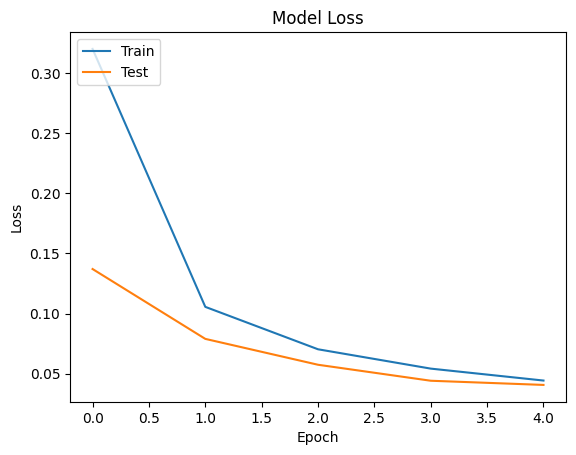

In [13]:
#plotting training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Visualizing the feature map

In [14]:
#creating an dvisualizing the feature map
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 7s 7s/step


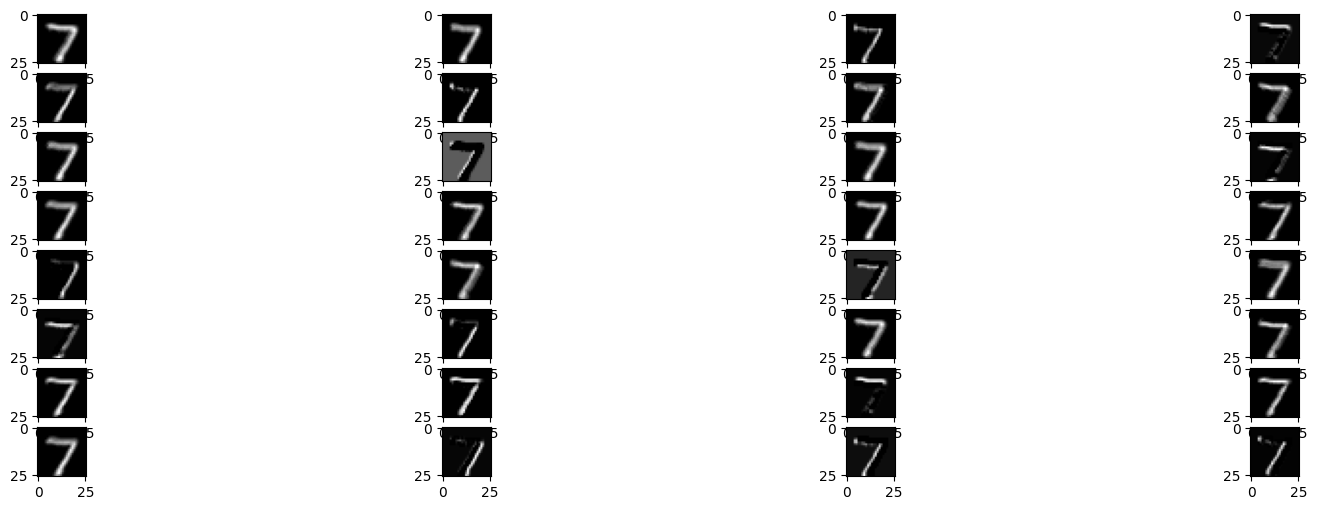

In [15]:
#visualizing the feature map
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
display_activation(activations, 4, 8, 0)